In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("기상청41_단기예보 조회서비스_오픈API활용가이드_격자_위경도(20240101).xlsx")

In [3]:
df

,구분,행정구역코드,1단계,2단계,3단계,격자 X,격자 Y,경도(시),경도(분),경도(초),위도(시),위도(분),위도(초),경도(초/100),위도(초/100),위치업데이트
0,kor,1100000000,서울특별시,NaN,NaN,60,127,126,58,48.03,37,33,48.85,126.980008,37.563569,NaN
1,kor,1111000000,서울특별시,종로구,NaN,60,127,126,58,53.91,37,34,13.36,126.981642,37.570378,NaN
2,kor,1111051500,서울특별시,종로구,청운효자동,60,127,126,58,14.35,37,35,2.89,126.970652,37.584137,NaN
3,kor,1111053000,서울특별시,종로구,사직동,60,127,126,58,15.44,37,34,23.77,126.970956,37.573269,NaN
4,kor,1111054000,서울특별시,종로구,삼청동,60,127,126,59,2.32,37,34,56.73,126.983978,37.582425,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3825,kor,5183031000,강원특별자치도,양양군,서면,87,138,128,35,15.55,38,4,7.26,128.587653,38.068683,20230611.0
3826,kor,5183032000,강원특별자치도,양양군,손양면,88,138,128,38,35.76,38,3,28.07,128.643267,38.057797,20230611.0
3827,kor,5183033000,강원특별자치도,양양군,현북면,89,137,128,43,31.15,38,0,58.57,128.725319,38.016269,20230611.0
3828,kor,5183034000,강원특별자치도,양양군,현남면,90,136,128,45,41.79,37,57,59.07,128.761608,37.966408,20230611.0


In [8]:
df.all

<bound method NDFrame._add_numeric_operations.<locals>.all of        구분      행정구역코드      1단계  2단계    3단계  격자 X  격자 Y  경도(시)  경도(분)  경도(초)  \
0     kor  1100000000    서울특별시  NaN    NaN    60   127    126     58  48.03   
1     kor  1111000000    서울특별시  종로구    NaN    60   127    126     58  53.91   
2     kor  1111051500    서울특별시  종로구  청운효자동    60   127    126     58  14.35   
3     kor  1111053000    서울특별시  종로구    사직동    60   127    126     58  15.44   
4     kor  1111054000    서울특별시  종로구    삼청동    60   127    126     59   2.32   
...   ...         ...      ...  ...    ...   ...   ...    ...    ...    ...   
3825  kor  5183031000  강원특별자치도  양양군     서면    87   138    128     35  15.55   
3826  kor  5183032000  강원특별자치도  양양군    손양면    88   138    128     38  35.76   
3827  kor  5183033000  강원특별자치도  양양군    현북면    89   137    128     43  31.15   
3828  kor  5183034000  강원특별자치도  양양군    현남면    90   136    128     45  41.79   
3829  kor  5183035000  강원특별자치도  양양군    강현면    87   140    128     36 

In [4]:
# 필요한 라이브러리 불러오기
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 가상의 날씨 데이터 생성
# 간단한 예로, 온도와 습도를 입력 변수로 사용하고, 강수량을 예측하도록 합니다.
# 이 데이터는 실제로는 실제 날씨 데이터로 대체되어야 합니다.
temperatures = np.random.randint(low=20, high=35, size=100)
humidities = np.random.randint(low=40, high=80, size=100)
# 강수량은 온도와 습도에 의존하도록 설정
precipitations = temperatures * 0.1 - humidities * 0.05 + np.random.normal(loc=0, scale=5, size=100)

# 데이터를 입력 변수(X)와 타겟 변수(y)로 분할
X = np.column_stack((temperatures, humidities))
y = precipitations

# 데이터를 학습용과 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
predictions = model.predict(X_test)

# 예측 결과 출력
for i in range(len(predictions)):
    print("실제 강수량:", y_test[i], "\t예측 강수량:", predictions[i])

실제 강수량: 3.584516311839173 	예측 강수량: -2.8802694779911953
실제 강수량: 5.3392078391550735 	예측 강수량: -0.015497136741449258
실제 강수량: -0.2204377872322827 	예측 강수량: 2.824994605231743
실제 강수량: -1.925572875319781 	예측 강수량: 0.8724953460104848
실제 강수량: -3.889039809263348 	예측 강수량: -1.9502658954676688
실제 강수량: 2.0850352572244115 	예측 강수량: 2.595288810029242
실제 강수량: -7.126935721300114 	예측 강수량: -3.1342558724702503
실제 강수량: -3.109497568901725 	예측 강수량: -0.673783824290883
실제 강수량: 0.021553966459272544 	예측 강수량: -1.8531434983614563
실제 강수량: 1.569918186089743 	예측 강수량: -2.3368356880430117
실제 강수량: 10.890447461354356 	예측 강수량: -1.731740501978691
실제 강수량: -3.1321944743533923 	예측 강수량: -0.4440780290883827
실제 강수량: 6.887319891812005 	예측 강수량: -0.4151671268798226
실제 강수량: 1.1889509777760203 	예측 강수량: -2.8317082794380886
실제 강수량: -5.204368961593488 	예측 강수량: 2.2750107165020443
실제 강수량: -0.2349058763016666 	예측 강수량: 1.2478847368723063
실제 강수량: 2.5443441702317324 	예측 강수량: 1.4710404332932905
실제 강수량: -6.400365952753822 	예측 강수량: 2.4804359124279918

In [10]:
!pip install folium

     ---------------------------------------- 100.0/100.0 kB ? eta 0:00:00
     ---------------------------------------- 83.9/83.9 kB ? eta 0:00:00


In [16]:
import folium

def display_map(latitude, longitude):
    # 위치 정보로 지도 중심 설정
    map_center = [latitude, longitude]
    
    # folium 지도 객체 생성
    m = folium.Map(location=map_center, zoom_start=10)
    
    # 마커 추가
    folium.Marker(location=map_center, popup='Your Location', icon=folium.Icon(color='blue')).add_to(m)
    
    # HTML 파일로 지도 저장
    m.save('map.html')

# 위도와 경도 입력 받기
latitude = float(input("위도를 입력하세요: "))
longitude = float(input("경도를 입력하세요: "))

# 지도 표시
display_map(latitude, longitude)


위도를 입력하세요: 37
경도를 입력하세요: 37


In [15]:
import matplotlib.pyplot as plt

def display_map(latitude, longitude):
    # 지도 이미지 로드
    map_img = plt.imread('https://maps.googleapis.com/maps/api/staticmap?center={},{}&zoom=10&size=640x640&key=YOUR_API_KEY'.format(latitude, longitude))

    # 이미지 플로팅
    plt.imshow(map_img)
    plt.scatter(320, 320, marker='o', color='blue', s=100, label='Your Location')  # 위치 표시
    plt.legend()
    plt.show()

# 위도와 경도 입력 받기
latitude = float(input("위도를 입력하세요: "))
longitude = float(input("경도를 입력하세요: "))

# 지도 표시
display_map(latitude, longitude)


위도를 입력하세요: 37
경도를 입력하세요: 37


ValueError: Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.

In [18]:
!pip install mplleaflet

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28574 sha256=c63f82c61e793e36182c1925cfdf7db550e43934d2d6f8edb22eb8a3c4afbfd1
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\fd\14\0a\f5fb496c1e6ac5aa9022db950ddf39da32b6fab7f1ec5d3b0d
Successfully built mplleaflet


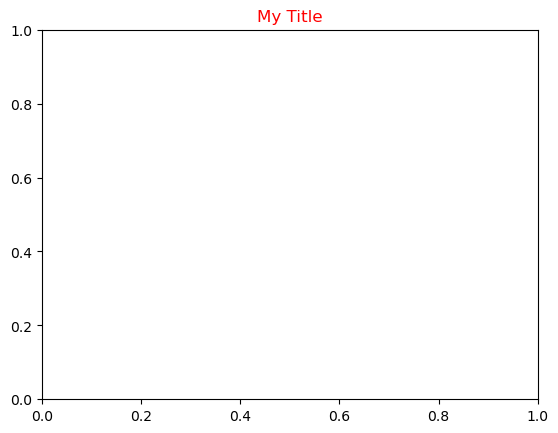

위도를 입력하세요: 30
경도를 입력하세요: 30


AttributeError: 'XAxis' object has no attribute '_gridOnMajor'

In [20]:
import mplleaflet
import matplotlib.pyplot as plt

def display_map(latitude, longitude):
    # 위치 표시
    plt.scatter(longitude, latitude, marker='o', color='blue', label='Your Location')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Your Location')

    # 지도로 변환하여 표시
    mplleaflet.display()
# import matplotlib.pyplot as plt

# 플롯 생성
fig, ax = plt.subplots()

# 제목 색상을 설정하는 올바른 방법
ax.set_title('My Title', color='red')

# 플롯 표시
plt.show()

    
# 위도와 경도 입력 받기
latitude = float(input("위도를 입력하세요: "))
longitude = float(input("경도를 입력하세요: "))

# 지도 표시
display_map(latitude, longitude)


In [21]:
import folium

# 중심 좌표 설정 (예: 서울, 대한민국)
center_coords = [37.5665, 126.9780]

# 지도 생성
map = folium.Map(location=center_coords, zoom_start=13)

# 마커 추가 (예: 경복궁)
folium.Marker(
    [37.5796, 126.9770], 
    popup='경복궁',
    tooltip='클릭하세요!'
).add_to(map)

# 마커 추가 (예: 남산타워)
folium.Marker(
    [37.5512, 126.9882], 
    popup='남산타워',
    tooltip='클릭하세요!'
).add_to(map)

# 지도를 HTML 파일로 저장
map.save('map.html')


In [22]:
import folium
from IPython.display import display

# 중심 좌표 설정 (예: 서울, 대한민국)
center_coords = [37.5665, 126.9780]

# 지도 생성
map = folium.Map(location=center_coords, zoom_start=13)

# 마커 추가 (예: 경복궁)
folium.Marker(
    [37.5796, 126.9770], 
    popup='경복궁',
    tooltip='클릭하세요!'
).add_to(map)

# 마커 추가 (예: 남산타워)
folium.Marker(
    [37.5512, 126.9882], 
    popup='남산타워',
    tooltip='클릭하세요!'
).add_to(map)

# 지도 표시
display(map)


In [23]:
import folium
import webbrowser
import os

# 중심 좌표 설정 (예: 서울, 대한민국)
center_coords = [37.5665, 126.9780]

# 지도 생성
map = folium.Map(location=center_coords, zoom_start=13)

# 마커 추가 (예: 경복궁)
folium.Marker(
    [37.5796, 126.9770], 
    popup='경복궁',
    tooltip='클릭하세요!'
).add_to(map)

# 마커 추가 (예: 남산타워)
folium.Marker(
    [37.5512, 126.9882], 
    popup='남산타워',
    tooltip='클릭하세요!'
).add_to(map)

# 지도를 임시 HTML 파일로 저장
map.save('temp_map.html')

# 임시 HTML 파일을 웹 브라우저에서 열기
webbrowser.open('file://' + os.path.realpath('temp_map.html'))


True

In [24]:
import folium
from IPython.display import display

# 중심 좌표 설정 (예: 서울, 대한민국)
center_coords = [37.5665, 126.9780]

# 지도 생성
map = folium.Map(location=center_coords, zoom_start=13)

# JavaScript 코드 추가: 클릭 시 마커 추가
click_js = '''
function(e) {
    var lat = e.latlng.lat;
    var lng = e.latlng.lng;
    var marker = L.marker([lat, lng]).addTo(this);
    marker.bindPopup('위도: ' + lat.toFixed(5) + '<br>경도: ' + lng.toFixed(5)).openPopup();
}
'''

# 지도에 클릭 이벤트 추가
map.add_child(folium.Map(location=center_coords, zoom_start=13))
map.add_child(folium.ClickForMarker(popup=None, callback=click_js))

# 지도 표시
display(map)


TypeError: ClickForMarker.__init__() got an unexpected keyword argument 'callback'

In [25]:
import folium
import webbrowser
import os

# 중심 좌표 설정 (예: 서울, 대한민국)
center_coords = [37.5665, 126.9780]

# 지도 생성
map = folium.Map(location=center_coords, zoom_start=13)

# JavaScript 코드 추가: 클릭 시 마커 추가
click_js = '''
function(e) {
    var lat = e.latlng.lat;
    var lng = e.latlng.lng;
    var marker = L.marker([lat, lng]).addTo(this);
    marker.bindPopup('위도: ' + lat.toFixed(5) + '<br>경도: ' + lng.toFixed(5)).openPopup();
}
'''

# 지도에 클릭 이벤트 추가
map.add_child(folium.Map(location=center_coords, zoom_start=13))
map.add_child(folium.ClickForMarker(popup=None, callback=click_js))

# 지도를 임시 HTML 파일로 저장
map.save('temp_map.html')

# 임시 HTML 파일을 웹 브라우저에서 열기
webbrowser.open('file://' + os.path.realpath('temp_map.html'))


TypeError: ClickForMarker.__init__() got an unexpected keyword argument 'callback'

In [26]:
import folium
import webbrowser
import os

# 중심 좌표 설정 (예: 서울, 대한민국)
center_coords = [37.5665, 126.9780]

# 지도 생성
map = folium.Map(location=center_coords, zoom_start=13)

# JavaScript 코드 추가: 클릭 시 마커 추가
click_js = '''
    function(e) {
        var lat = e.latlng.lat;
        var lng = e.latlng.lng;
        var marker = L.marker([lat, lng]).addTo(this);
        marker.bindPopup('위도: ' + lat.toFixed(5) + '<br>경도: ' + lng.toFixed(5)).openPopup();
    }
'''
# Custom JavaScript 추가
map.get_root().html.add_child(folium.Element(f'''
    <script>
    var map = {map.get_name()};
    map.on('click', {click_js});
    </script>
'''))

# 지도를 임시 HTML 파일로 저장
map.save('temp_map.html')

# 임시 HTML 파일을 웹 브라우저에서 열기
webbrowser.open('file://' + os.path.realpath('temp_map.html'))


True

In [30]:
import folium
import webbrowser
import os

# 중심 좌표 설정 (예: 서울, 대한민국)
center_coords = [37.5665, 126.9780]

# 지도 생성
map = folium.Map(location=center_coords, zoom_start=13)

# JavaScript 코드 추가: 클릭 시 마커 추가
click_js = '''
    function(e) {
        var lat = e.latlng.lat;
        var lng = e.latlng.lng;
        var marker = L.marker([lat, lng]).addTo(map);
        marker.bindPopup('위도: ' + lat.toFixed(5) + '<br>경도: ' + lng.toFixed(5)).openPopup();
    }
'''

# Custom JavaScript 추가
map.get_root().html.add_child(folium.Element(f'''
    <script>
    var map = {map.get_name()};
    map.on('click', {click_js});
    </script>
'''))

# 지도를 임시 HTML 파일로 저장
map.save('temp_map.html')

# 임시 HTML 파일을 웹 브라우저에서 열기
webbrowser.open('file://' + os.path.realpath('temp_map.html'))


True

In [31]:
import folium
import webbrowser
import os

# 중심 좌표 설정 (예: 서울, 대한민국)
center_coords = [37.5665, 126.9780]

# 지도 생성
map = folium.Map(location=center_coords, zoom_start=13)

# JavaScript 코드 추가: 클릭 시 마커 추가
click_js = '''
function(e) {
    var lat = e.latlng.lat;
    var lng = e.latlng.lng;
    var marker = L.marker([lat, lng]).addTo(map);
    marker.bindPopup('위도: ' + lat.toFixed(5) + '<br>경도: ' + lng.toFixed(5)).openPopup();
}
'''

# Custom JavaScript 추가
map.get_root().html.add_child(folium.Element(f'''
    <script>
    var map = {map.get_name()};
    map.on('click', {click_js});
    </script>
'''))

# 지도를 임시 HTML 파일로 저장
map.save('temp_map.html')

# 임시 HTML 파일을 웹 브라우저에서 열기
webbrowser.open('file://' + os.path.realpath('temp_map.html'))


True

In [34]:
!pip install ipyleaflet
!pip install ipywidgets

     ---------------------------------------- 1.1/1.1 MB 34.3 MB/s eta 0:00:00


In [36]:
from ipyleaflet import Map, Marker
from ipywidgets import HTML

# 지도 생성 (중심 좌표: 서울)
center = [37.5665, 126.9780]
m = Map(center=center, zoom=13)

# 마커 추가 함수
def on_map_click(event, **kwargs):
    marker = Marker(location=event['coordinates'])
    message = HTML()
    message.value = f'위도: {event["coordinates"][0]:.5f}<br>경도: {event["coordinates"][1]:.5f}'
    marker.popup = message
    m.add_layer(marker)

# 클릭 이벤트 연결
m.on_interaction(on_map_click)

# 지도 표시
m


Map(center=[37.5665, 126.978], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [37]:
m

Map(center=[37.5665, 126.978], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [38]:
from ipyleaflet import Map, Marker
from ipywidgets import HTML

# 지도 생성 (중심 좌표: 서울)
center = [37.5665, 126.9780]
m = Map(center=center, zoom=13)

# 마커 추가 함수
def on_map_click(event, **kwargs):
    if event['type'] == 'click':
        marker = Marker(location=event['coordinates'])
        message = HTML()
        message.value = f'위도: {event["coordinates"][0]:.5f}<br>경도: {event["coordinates"][1]:.5f}'
        marker.popup = message
        m.add_layer(marker)

# 클릭 이벤트 연결
m.on_interaction(on_map_click)

# 지도 표시
display(m)


Map(center=[37.5665, 126.978], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…